In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))



/var/folders/89/g9qfd5w53x7f75_j9jnrxvr00000gn/T/ipykernel_72189/3453545336.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
from loguru import logger
import dataloader 
import numpy as np

In [46]:
import importlib

import tf_models  # First, import the library
importlib.reload(tf_models)  # Now, reload it


<module 'tf_models' from '/Users/ziliangpeng/code/naoshima/ml/objcla/tf_models.py'>

In [39]:
import dataloader
# no onehot
x_train, y_train, x_test, y_test = dataloader.load_cifar10(onehot=True)
# if X_train.ndim == 3:
#     X_train = X_train[...,np.newaxis]
#     X_test = X_test[...,np.newaxis]
logger.info(x_train.shape)
logger.info(x_test.shape)

2023-10-01 16:15:27.985 | INFO     | dataloader:_load_keras:30 - Using cifar10 dataset
2023-10-01 16:15:27.986 | INFO     | dataloader:_load_keras:33 - The size is 50000
2023-10-01 16:15:27.986 | INFO     | dataloader:_load_keras:34 - The shape is: (32, 32, 3)
2023-10-01 16:15:28.734 | INFO     | __main__:<module>:7 - (50000, 32, 32, 3)
2023-10-01 16:15:28.748 | INFO     | __main__:<module>:8 - (10000, 32, 32, 3)


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np
import dataloader

from tf_models import *

# dataset = "mnist"

# loader = getattr(dataloader, f"load_{dataset}")
# x_train, y_train, x_test, y_test = loader(onehot=True)

if x_train[0].ndim == 2:
    x_train = x_train[..., np.newaxis]
    x_test = x_test[..., np.newaxis]
image_shape = x_train[0].shape
logger.info(f"image shape: {image_shape}")

model = AlexNet(image_shape, num_classes=y_train.shape[1])

model.compile(
    optimizer="adam", loss=CategoricalCrossentropy(), metrics=["accuracy"]
)


2023-10-01 16:16:54.207 | INFO     | __main__:<module>:22 - image shape: (32, 32, 3)


In [52]:
with tf.device("/GPU:0"):
    history = model.fit(
        x_train, y_train, epochs=3, batch_size=64, validation_split=0.2
    )
# Evaluate the model on the test set
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f"Test loss: {loss:.4f}")
# print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/3
625/625 [==============================] - 88s 140ms/step - loss: 143788048.0000 - accuracy: 0.8117 - val_loss: 567895488.0000 - val_accuracy: 0.6243
Epoch 2/3
625/625 [==============================] - 92s 148ms/step - loss: 139318544.0000 - accuracy: 0.8172 - val_loss: 610225472.0000 - val_accuracy: 0.6467
Epoch 3/3
625/625 [==============================] - 92s 147ms/step - loss: 152606000.0000 - accuracy: 0.8151 - val_loss: 661523584.0000 - val_accuracy: 0.6107


In [53]:
# model.save('viz.h5')
model.save('viz.keras')

In [33]:
from tensorflow.keras.models import load_model

model = load_model('viz.h5')  # Load from HDF5 format

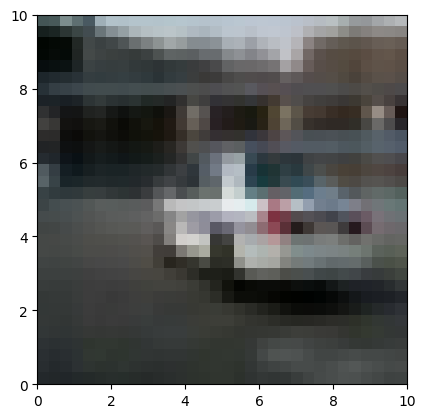

2023-10-01 18:59:08.056 | INFO     | __main__:<module>:21 - (1, 32, 32, 96)
2023-10-01 18:59:08.056 | INFO     | __main__:<module>:22 - conv2d_55


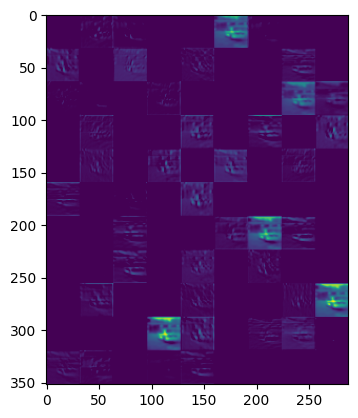

2023-10-01 18:59:08.213 | INFO     | __main__:<module>:21 - (1, 32, 32, 96)
2023-10-01 18:59:08.214 | INFO     | __main__:<module>:22 - batch_normalization_55


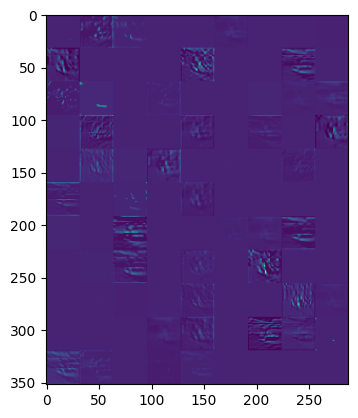

2023-10-01 18:59:08.353 | INFO     | __main__:<module>:21 - (1, 16, 16, 96)
2023-10-01 18:59:08.354 | INFO     | __main__:<module>:22 - max_pooling2d_33


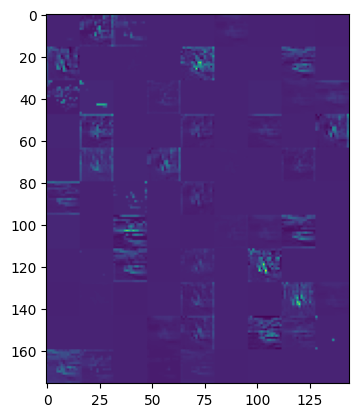

2023-10-01 18:59:08.534 | INFO     | __main__:<module>:21 - (1, 16, 16, 256)
2023-10-01 18:59:08.535 | INFO     | __main__:<module>:22 - conv2d_56


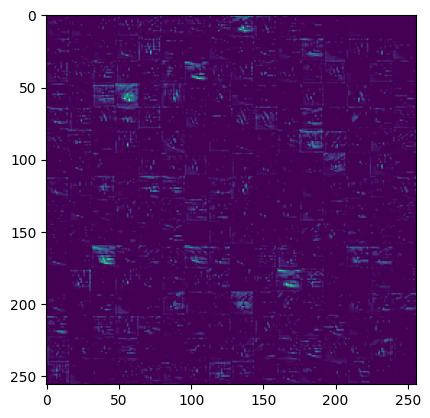

2023-10-01 18:59:08.778 | INFO     | __main__:<module>:21 - (1, 16, 16, 256)
2023-10-01 18:59:08.778 | INFO     | __main__:<module>:22 - batch_normalization_56


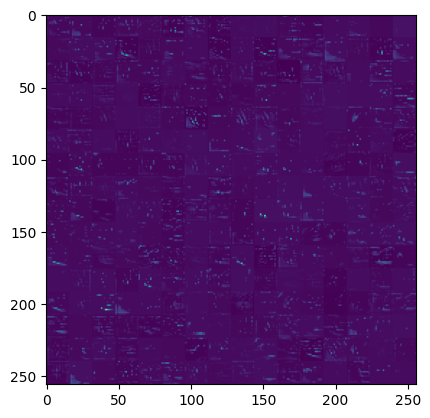

2023-10-01 18:59:08.986 | INFO     | __main__:<module>:21 - (1, 8, 8, 256)
2023-10-01 18:59:08.986 | INFO     | __main__:<module>:22 - max_pooling2d_34


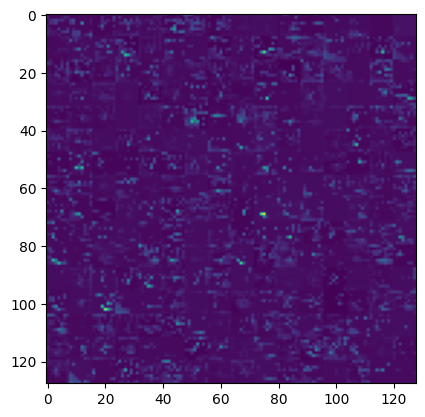

2023-10-01 18:59:09.236 | INFO     | __main__:<module>:21 - (1, 8, 8, 384)
2023-10-01 18:59:09.236 | INFO     | __main__:<module>:22 - conv2d_57


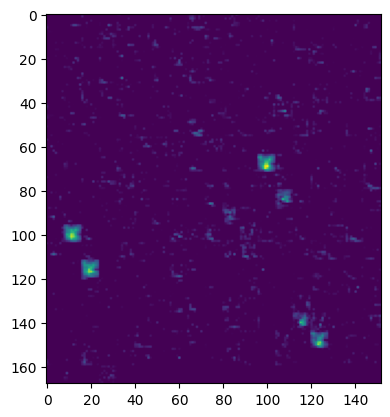

2023-10-01 18:59:09.546 | INFO     | __main__:<module>:21 - (1, 8, 8, 384)
2023-10-01 18:59:09.547 | INFO     | __main__:<module>:22 - batch_normalization_57


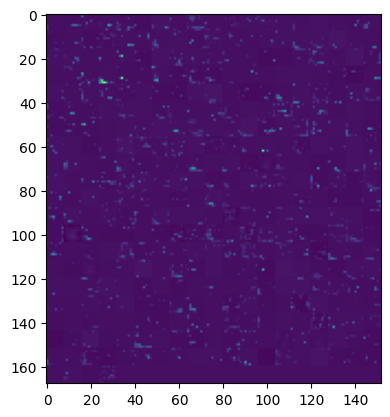

2023-10-01 18:59:09.863 | INFO     | __main__:<module>:21 - (1, 8, 8, 384)
2023-10-01 18:59:09.863 | INFO     | __main__:<module>:22 - conv2d_58


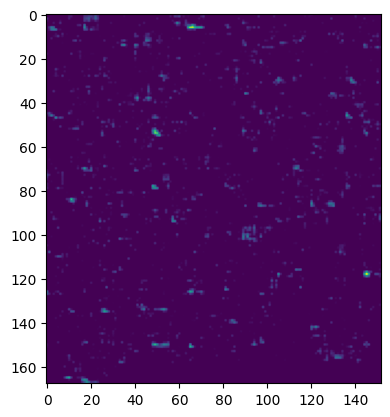

2023-10-01 18:59:10.174 | INFO     | __main__:<module>:21 - (1, 8, 8, 384)
2023-10-01 18:59:10.175 | INFO     | __main__:<module>:22 - batch_normalization_58


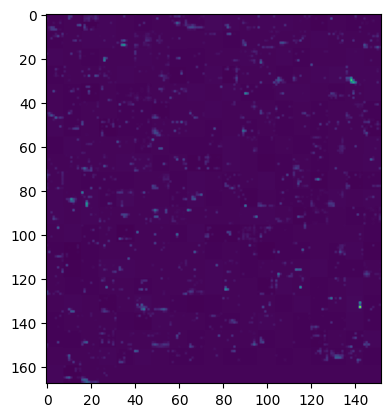

2023-10-01 18:59:10.478 | INFO     | __main__:<module>:21 - (1, 8, 8, 256)
2023-10-01 18:59:10.478 | INFO     | __main__:<module>:22 - conv2d_59


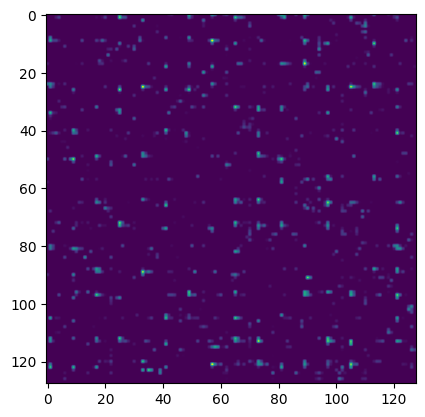

2023-10-01 18:59:10.878 | INFO     | __main__:<module>:21 - (1, 8, 8, 256)
2023-10-01 18:59:10.878 | INFO     | __main__:<module>:22 - batch_normalization_59


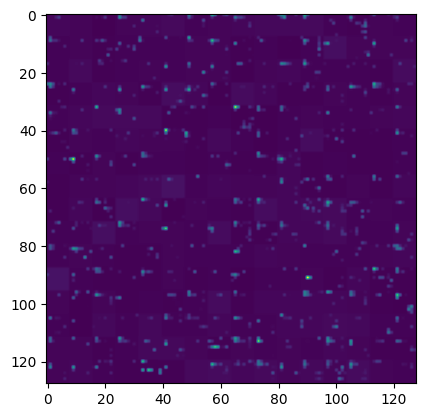

2023-10-01 18:59:11.375 | INFO     | __main__:<module>:21 - (1, 4, 4, 256)
2023-10-01 18:59:11.376 | INFO     | __main__:<module>:22 - max_pooling2d_35


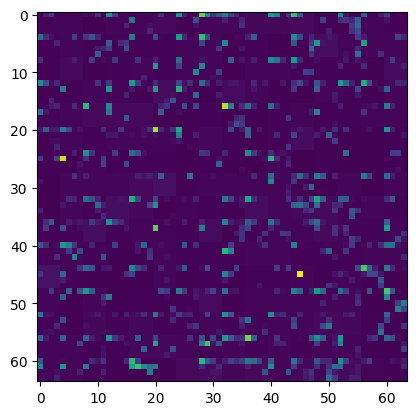

2023-10-01 18:59:11.591 | INFO     | __main__:<module>:21 - (1, 4096)
2023-10-01 18:59:11.591 | INFO     | __main__:<module>:22 - flatten_11


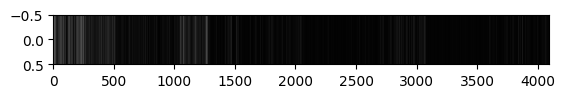

2023-10-01 18:59:11.629 | INFO     | __main__:<module>:21 - (1, 4096)
2023-10-01 18:59:11.629 | INFO     | __main__:<module>:22 - dense_33


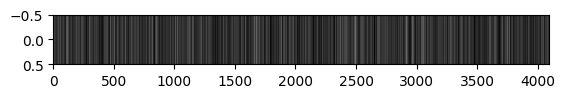

2023-10-01 18:59:11.684 | INFO     | __main__:<module>:21 - (1, 4096)
2023-10-01 18:59:11.684 | INFO     | __main__:<module>:22 - dropout_22


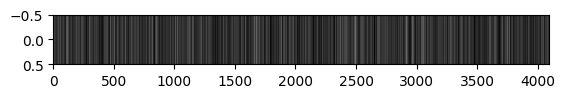

2023-10-01 18:59:11.720 | INFO     | __main__:<module>:21 - (1, 4096)
2023-10-01 18:59:11.721 | INFO     | __main__:<module>:22 - dense_34


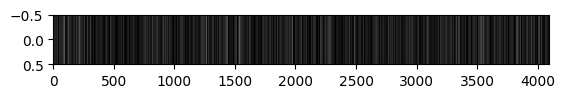

2023-10-01 18:59:11.777 | INFO     | __main__:<module>:21 - (1, 4096)
2023-10-01 18:59:11.778 | INFO     | __main__:<module>:22 - dropout_23


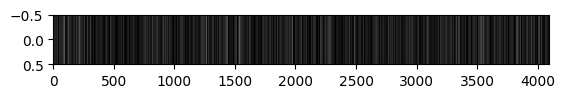

2023-10-01 18:59:11.816 | INFO     | __main__:<module>:21 - (1, 10)
2023-10-01 18:59:11.816 | INFO     | __main__:<module>:22 - dense_35


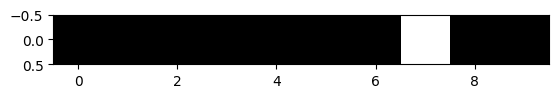

2023-10-01 18:59:11.846 | INFO     | __main__:<module>:27 - tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
2023-10-01 18:59:11.846 | INFO     | __main__:<module>:29 - 1
2023-10-01 18:59:11.846 | INFO     | __main__:<module>:30 - 7


In [54]:
# CNN viz
import math
from viz import viz_1d, viz_3d

img_index = 506

img = X_train[img_index]
label = y_train[img_index]
input = X_train[img_index:img_index+1,]

plt.imshow(img, cmap='viridis', extent=[0, 10, 0, 10])
plt.show()

ls = model.layers
os = []
o = input
assert input.shape[0] == 1
for l in ls:
    o = l(o)
    os.append(o)
    logger.info(o.shape)
    logger.info(l.name)
    if o.ndim == 2:
        viz_1d(o)
    if o.ndim == 4:
        viz_3d(o)
logger.info(o)

logger.info(np.argmax(label))
logger.info(np.argmax(o))